In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [142]:
np.random.seed(1)

In [143]:
X = np.random.normal(0,10,[40,20])
y = np.random.normal(0,10,[40, 1])

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=42)

In [145]:
lr = LinearRegression()

In [146]:
R2 = []
mse_train = []
mse_test = []
for i in range(20):
    lr.fit(X_train[:,:i+1],y_train)
    R_ = lr.score(X_train[:,:i+1],y_train)
    R2.append(R_)
    y_pred = lr.predict(X_train[:,:i+1])
    mse_train.append(mean_squared_error(y_pred, y_train))
    y_pred_t = lr.predict(X_test[:,:i+1])
    mse_test.append(mean_squared_error(y_pred_t, y_test))

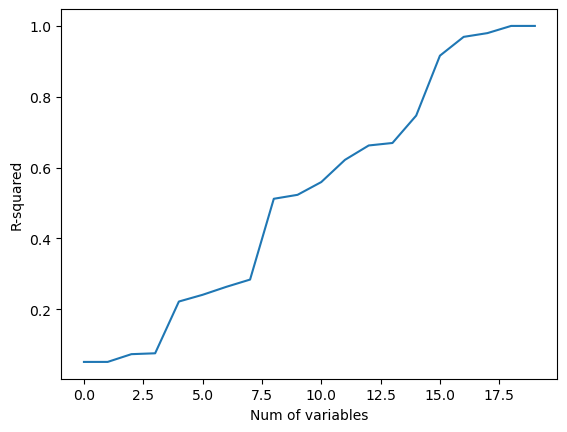

In [147]:
plt.plot(R2)
plt.xlabel('Num of variables')
plt.ylabel('R-squared')
plt.show()

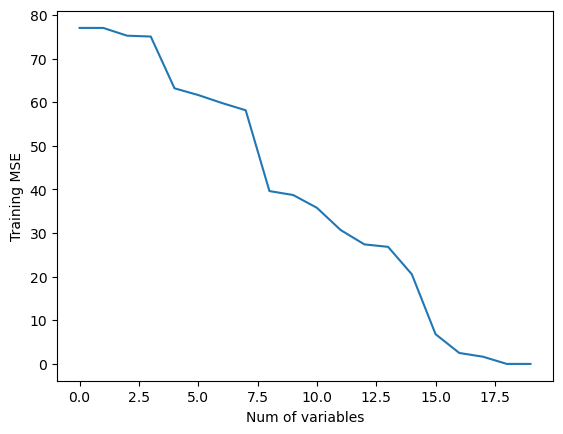

In [148]:
plt.plot(mse_train)
plt.xlabel('Num of variables')
plt.ylabel('Training MSE')
plt.show()

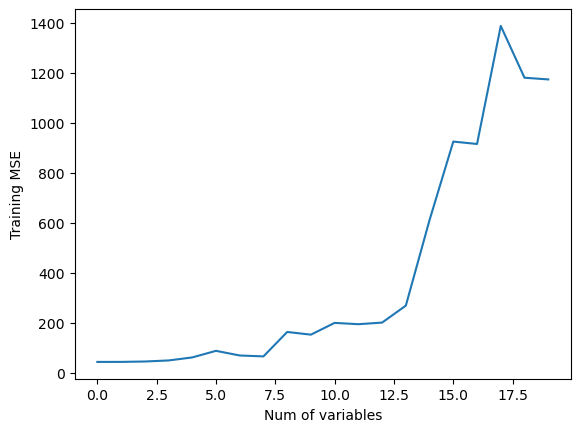

In [149]:
plt.plot(mse_test)
plt.xlabel('Num of variables')
plt.ylabel('Training MSE')
plt.show()